In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [125]:
dataroot = f"/users/vicky/workspace/road-to-SKA/LoTTS_data/"
datacutout = f"LoTSS_cutouts_asinh"
imgpath = f"{dataroot}{datacutout}"
all_img = os.listdir(imgpath)
n_images = len(all_img)
print(n_images)
labels = pd.read_csv(f"{dataroot}{'classifications_horton_et_al_2025.csv'}")

7607


In [126]:
print(sorted(list(all_img[:5])))
len(all_img)

['ILTJ002221.05+323539.5.png', 'ILTJ082226.54+314100.0.png', 'ILTJ130608.14+624154.1.png', 'ILTJ140019.02+533659.3.png', 'ILTJ175219.43+453957.8.png']


7607

In [127]:
print(sorted(labels["Source_Name"][:5]))
len(labels)

['ILTJ000005.31+205913.2', 'ILTJ000032.63+351901.7', 'ILTJ000043.32+332603.9', 'ILTJ000104.16+273449.7', 'ILTJ000107.24+340152.1']


7613

In [128]:
# Create a set of source names that have images
# This removes the '.png' from filenames like 'ILTJ002221.05+323539.5.png'
image_source_names = {img.replace('.png', '') for img in all_img}
# 'print(image_source_names)
image_source_names = sorted(image_source_names)

In [129]:
label_clean = labels[labels['Source_Name'].isin(image_source_names)].copy()
#Verify the new length maches the n_images(7607)
print(f"Original labels: {len(labels)}")
print(f"Cleaned labels: {len(label_clean)}")

Original labels: 7613
Cleaned labels: 7607


In [130]:
label_clean.to_csv("classifications_horton_et_al_2025_filtered.csv", index=False)

In [131]:
filtered_dataset= pd.read_csv("classifications_horton_et_al_2025_filtered.csv")
len(filtered_dataset)
#print(filtered_dataset[:5])

7607

In [132]:
#print(filtered_dataset)

In [133]:
# 1. Clean the image filenames to match the CSV format
image_names_set = {img.replace('.png', '') for img in all_img}

# 2. Find sources that are in the labels CSV but NOT in the image folder
missing_mask = ~labels['Source_Name'].isin(image_names_set)
missing_galaxies = labels[missing_mask]

# 3. List the 6 missing galaxies
print(f"Total missing: {len(missing_galaxies)}")
print(missing_galaxies[['Source_Name', 'z_best', 'fri', 'frii']])

Total missing: 6
                 Source_Name    z_best    fri   frii
5151  ILTJ142332.92+275111.5  0.671305  False   True
5292  ILTJ143526.45+275331.0  0.175984  False   True
7092  ILTJ215728.75+234648.3  0.248385  False   True
7311  ILTJ230032.44+161645.4  0.621100  False   True
7366  ILTJ231330.22+161409.1  0.106127   True  False
7409  ILTJ232148.47+162412.9  0.546433  False   True


In [134]:
import numpy as np
from PIL import Image
import os

# 1. Align the CSV with the images
image_names_clean = {img.replace('.png', '') for img in all_img}
labels_cleaned = labels[labels['Source_Name'].isin(image_names_clean)].sort_values('Source_Name').reset_index(drop=True)

# 2. Identify the morphological label columns
# Based on your column list: 'fri', 'frii', 'hybrid', 'spiral', etc.
label_colums = ['fri', 'frii', 'hybrid', 'spiral', 'relaxed', 'cshaped',
       'sshaped', 'misaligned', 'wings', 'xshaped', 'straight',
       'multihotspots', 'continuous', 'banding', 'onesided', 'restarted',
       'cluster', 'merger', 'diffuse', 'unknown']

# 3. Create the labels array (n_images, n_labels)
Y = labels_cleaned[label_cols].values.astype(float)
print(f"Labels array shape: {Y.shape}")

Labels array shape: (7607, 19)


In [136]:
import numpy as np
from PIL import Image
import os
from tqdm import tqdm

def prepare_final_arrays(df, img_dir, n_pix=89):
    n_samples = len(df)
    #print(n_samples)
    # Shape: (7607, 89, 89) 
    # We omit the 1-channel dimension if you want a flat 2D image array
    X = np.zeros((n_samples, n_pix, n_pix), dtype=np.uint8)
    print(X)
    
    print(f"Processing {n_samples} images to {n_pix}x{n_pix} grayscale...")
    for i, name in enumerate(tqdm(df['Source_Name'])):
        path = os.path.join(img_dir, f"{name}.png")
        
        # Convert to 'L' (Grayscale) and resize
        img = Image.open(path).convert('L')
        img = img.resize((n_pix, n_pix))
        
        X[i] = np.array(img)
        
    return X

# Assuming imgpath is your LoTSS_cutouts_asinh folder
X = prepare_final_arrays(labels_cleaned, imgpath, n_pix=89)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
Processing 7607 images to 89x89 grayscale...


100%|██████████| 7607/7607 [00:05<00:00, 1307.91it/s]


In [137]:
# Labels
label_colums = ['fri', 'frii', 'hybrid', 'spiral', 'relaxed', 'cshaped',
       'sshaped', 'misaligned', 'wings', 'xshaped', 'straight',
       'multihotspots', 'continuous', 'banding', 'onesided', 'restarted',
       'cluster', 'merger', 'diffuse', 'unknown']

Y = labels_cleaned[label_colums].values.astype(np.float32)

In [138]:
# Save images (7607, 89, 89)
np.save(f"{dataroot}X_radio_gray_89.npy", X)

# Save labels (7607, 19)
np.save(f"{dataroot}Y_morphology_labels.npy", Y)

print("--- Final Array Shapes ---")
print(f"X: {X.shape}")
print(f"Y: {Y.shape}")

--- Final Array Shapes ---
X: (7607, 89, 89)
Y: (7607, 20)


In [139]:
img_array=np.load("/users/vicky/workspace/road-to-SKA/LoTTS_data/X_radio_gray_89.npy")
label_array=np.load("/users/vicky/workspace/road-to-SKA/LoTTS_data/Y_morphology_labels.npy")
print(img_array[0])

[[15 13  7 ...  8  9 11]
 [23 20 14 ...  9  8  9]
 [31 28 24 ...  6  5  5]
 ...
 [ 2  2  2 ...  2  2  2]
 [ 2  2  2 ...  2  2  2]
 [ 2  2  2 ...  2  2  2]]


In [140]:
print(label_array[0])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [141]:
def prepare_final_arrays(df, img_dir, n_pix=89):
    n_samples = len(df)
    # Initialize the array
    X = np.zeros((n_samples, n_pix, n_pix), dtype=np.uint8)
    
    print(f"Processing {n_samples} images to {n_pix}x{n_pix} grayscale...")
    
    for i, name in enumerate(tqdm(df['Source_Name'])):
        path = os.path.join(img_dir, f"{name}.png")
        
        try:
            # 1. Open and convert to Gray
            img = Image.open(path).convert('L')
            
            # 2. Resize with a high-quality filter (LANCZOS)
            # This is better for scientific data than the default
            img = img.resize((n_pix, n_pix), Image.Resampling.LANCZOS)
            # print(img.shape)
            
            # 3. Store in array
            X[i] = np.array(img)
            print(X[0].shape)
            break
            
        except FileNotFoundError:
            print(f"Warning: {name}.png not found at {path}")
            continue
            
    return X

# Run the processing
X = prepare_final_arrays(labels_cleaned, imgpath, n_pix=89)

# (Optional) If your model expects (Samples, H, W, 1)
# X = np.expand_dims(X, axis=-1)

Processing 7607 images to 89x89 grayscale...


  0%|          | 0/7607 [00:00<?, ?it/s]

(89, 89)


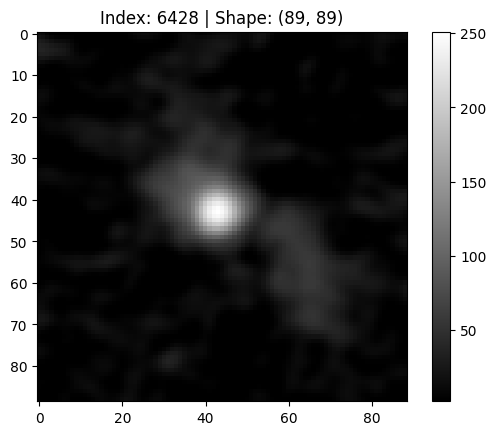

In [107]:
import matplotlib.pyplot as plt

# Pick a random galaxy to verify the resize and grayscale
idx = np.random.randint(0, len(X))
plt.imshow(X[0], cmap='gray')
plt.title(f"Index: {idx} | Shape: {X[idx].shape}")
plt.colorbar()
plt.show()